## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9653940	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9460126	total: 58.8ms	remaining: 29.3s
2:	learn: 0.9273891	total: 59.7ms	remaining: 19.9s
3:	learn: 0.9104691	total: 60.7ms	remaining: 15.1s
4:	learn: 0.8938022	total: 61.7ms	remaining: 12.3s
5:	learn: 0.8789489	total: 62.6ms	remaining: 10.4s
6:	learn: 0.8624526	total: 63.9ms	remaining: 9.06s
7:	learn: 0.8469335	total: 64.7ms	remaining: 8.03s
8:	learn: 0.8324871	total: 65.6ms	remaining: 7.22s
9:	learn: 0.8161517	total: 67.1ms	remaining: 6.64s
10:	learn: 0.8010794	total: 67.9ms	remaining: 6.1s
11:	learn: 0.7852108	total: 68.8ms	remaining: 5.66s
12:	learn: 0.7704701	total: 69.6ms	remaining: 5.29s
13:	learn: 0.7547912	total: 70.6ms	remaining: 4.97s
14:	learn: 0.7411215	total: 71.5ms	remaining: 4.69s
15:	learn: 0.7267776	total: 72.3ms	remaining: 4.45s
16:	learn: 0.7136046	total: 73.2ms	remaining: 4.23s
17:	learn: 0.7005053	total: 74ms	remaining: 4.04s
18:	learn: 0.6881258	total: 74.9ms	remaining: 3

49:	learn: 0.4370220	total: 104ms	remaining: 1.98s
50:	learn: 0.4320192	total: 105ms	remaining: 1.96s
51:	learn: 0.4268694	total: 106ms	remaining: 1.94s
52:	learn: 0.4217996	total: 107ms	remaining: 1.92s
53:	learn: 0.4168128	total: 108ms	remaining: 1.9s
54:	learn: 0.4126524	total: 109ms	remaining: 1.88s
55:	learn: 0.4078768	total: 111ms	remaining: 1.87s
56:	learn: 0.4039347	total: 112ms	remaining: 1.86s
57:	learn: 0.3995821	total: 113ms	remaining: 1.84s
58:	learn: 0.3966325	total: 114ms	remaining: 1.82s
59:	learn: 0.3926530	total: 115ms	remaining: 1.8s
60:	learn: 0.3889930	total: 116ms	remaining: 1.79s
61:	learn: 0.3855061	total: 117ms	remaining: 1.77s
62:	learn: 0.3819110	total: 118ms	remaining: 1.75s
63:	learn: 0.3785582	total: 119ms	remaining: 1.74s
64:	learn: 0.3752560	total: 120ms	remaining: 1.73s
65:	learn: 0.3716891	total: 121ms	remaining: 1.71s
66:	learn: 0.3688789	total: 122ms	remaining: 1.7s
67:	learn: 0.3656203	total: 123ms	remaining: 1.69s
68:	learn: 0.3628060	total: 124ms	

133:	learn: 0.2548774	total: 192ms	remaining: 1.24s
134:	learn: 0.2539293	total: 193ms	remaining: 1.24s
135:	learn: 0.2530605	total: 194ms	remaining: 1.23s
136:	learn: 0.2521449	total: 195ms	remaining: 1.23s
137:	learn: 0.2512229	total: 196ms	remaining: 1.22s
138:	learn: 0.2505154	total: 197ms	remaining: 1.22s
139:	learn: 0.2496370	total: 198ms	remaining: 1.22s
140:	learn: 0.2489141	total: 199ms	remaining: 1.21s
141:	learn: 0.2478368	total: 201ms	remaining: 1.21s
142:	learn: 0.2466827	total: 202ms	remaining: 1.21s
143:	learn: 0.2458776	total: 203ms	remaining: 1.2s
144:	learn: 0.2452611	total: 204ms	remaining: 1.2s
145:	learn: 0.2442423	total: 205ms	remaining: 1.2s
146:	learn: 0.2435600	total: 205ms	remaining: 1.19s
147:	learn: 0.2425896	total: 206ms	remaining: 1.19s
148:	learn: 0.2418426	total: 208ms	remaining: 1.19s
149:	learn: 0.2410307	total: 209ms	remaining: 1.18s
150:	learn: 0.2400660	total: 210ms	remaining: 1.18s
151:	learn: 0.2393574	total: 211ms	remaining: 1.18s
152:	learn: 0.2

246:	learn: 0.1869963	total: 295ms	remaining: 899ms
247:	learn: 0.1865313	total: 296ms	remaining: 897ms
248:	learn: 0.1860282	total: 297ms	remaining: 895ms
249:	learn: 0.1856682	total: 298ms	remaining: 893ms
250:	learn: 0.1852029	total: 298ms	remaining: 891ms
251:	learn: 0.1848105	total: 299ms	remaining: 889ms
252:	learn: 0.1844034	total: 300ms	remaining: 886ms
253:	learn: 0.1838620	total: 301ms	remaining: 885ms
254:	learn: 0.1834418	total: 303ms	remaining: 884ms
255:	learn: 0.1829505	total: 304ms	remaining: 883ms
256:	learn: 0.1825408	total: 306ms	remaining: 885ms
257:	learn: 0.1820835	total: 307ms	remaining: 884ms
258:	learn: 0.1818231	total: 308ms	remaining: 882ms
259:	learn: 0.1814452	total: 309ms	remaining: 880ms
260:	learn: 0.1812601	total: 310ms	remaining: 878ms
261:	learn: 0.1809580	total: 311ms	remaining: 876ms
262:	learn: 0.1805861	total: 312ms	remaining: 873ms
263:	learn: 0.1804395	total: 313ms	remaining: 872ms
264:	learn: 0.1801247	total: 314ms	remaining: 870ms
265:	learn: 

347:	learn: 0.1556490	total: 382ms	remaining: 715ms
348:	learn: 0.1552860	total: 383ms	remaining: 714ms
349:	learn: 0.1551847	total: 384ms	remaining: 713ms
350:	learn: 0.1549771	total: 385ms	remaining: 712ms
351:	learn: 0.1548410	total: 386ms	remaining: 711ms
352:	learn: 0.1544402	total: 387ms	remaining: 710ms
353:	learn: 0.1542059	total: 389ms	remaining: 709ms
354:	learn: 0.1537491	total: 390ms	remaining: 708ms
355:	learn: 0.1535358	total: 391ms	remaining: 708ms
356:	learn: 0.1533174	total: 393ms	remaining: 707ms
357:	learn: 0.1528983	total: 394ms	remaining: 706ms
358:	learn: 0.1528350	total: 395ms	remaining: 706ms
359:	learn: 0.1525326	total: 396ms	remaining: 704ms
360:	learn: 0.1524394	total: 399ms	remaining: 707ms
361:	learn: 0.1523240	total: 400ms	remaining: 705ms
362:	learn: 0.1521456	total: 401ms	remaining: 704ms
363:	learn: 0.1516867	total: 403ms	remaining: 703ms
364:	learn: 0.1512718	total: 404ms	remaining: 703ms
365:	learn: 0.1510899	total: 406ms	remaining: 702ms
366:	learn: 

413:	learn: 0.1390553	total: 486ms	remaining: 688ms
414:	learn: 0.1388034	total: 487ms	remaining: 687ms
415:	learn: 0.1385395	total: 489ms	remaining: 686ms
416:	learn: 0.1382945	total: 490ms	remaining: 685ms
417:	learn: 0.1381139	total: 491ms	remaining: 684ms
418:	learn: 0.1378009	total: 492ms	remaining: 683ms
419:	learn: 0.1374614	total: 493ms	remaining: 681ms
420:	learn: 0.1370651	total: 495ms	remaining: 680ms
421:	learn: 0.1366736	total: 495ms	remaining: 678ms
422:	learn: 0.1363886	total: 496ms	remaining: 677ms
423:	learn: 0.1360897	total: 497ms	remaining: 675ms
424:	learn: 0.1358139	total: 498ms	remaining: 674ms
425:	learn: 0.1356561	total: 500ms	remaining: 673ms
426:	learn: 0.1354345	total: 501ms	remaining: 672ms
427:	learn: 0.1350338	total: 502ms	remaining: 671ms
428:	learn: 0.1347309	total: 503ms	remaining: 670ms
429:	learn: 0.1346616	total: 505ms	remaining: 669ms
430:	learn: 0.1343985	total: 506ms	remaining: 668ms
431:	learn: 0.1341459	total: 507ms	remaining: 666ms
432:	learn: 

483:	learn: 0.1222387	total: 576ms	remaining: 614ms
484:	learn: 0.1219634	total: 577ms	remaining: 613ms
485:	learn: 0.1217944	total: 578ms	remaining: 611ms
486:	learn: 0.1215102	total: 579ms	remaining: 610ms
487:	learn: 0.1213279	total: 580ms	remaining: 609ms
488:	learn: 0.1212091	total: 581ms	remaining: 607ms
489:	learn: 0.1208836	total: 582ms	remaining: 606ms
490:	learn: 0.1205699	total: 583ms	remaining: 605ms
491:	learn: 0.1204158	total: 585ms	remaining: 604ms
492:	learn: 0.1201625	total: 586ms	remaining: 603ms
493:	learn: 0.1200116	total: 587ms	remaining: 602ms
494:	learn: 0.1197838	total: 589ms	remaining: 600ms
495:	learn: 0.1194438	total: 590ms	remaining: 599ms
496:	learn: 0.1192734	total: 600ms	remaining: 608ms
497:	learn: 0.1192127	total: 601ms	remaining: 606ms
498:	learn: 0.1190261	total: 602ms	remaining: 605ms
499:	learn: 0.1189473	total: 605ms	remaining: 605ms
500:	learn: 0.1187188	total: 607ms	remaining: 604ms
501:	learn: 0.1185329	total: 608ms	remaining: 603ms
502:	learn: 

549:	learn: 0.1087271	total: 681ms	remaining: 557ms
550:	learn: 0.1084778	total: 682ms	remaining: 556ms
551:	learn: 0.1083437	total: 683ms	remaining: 555ms
552:	learn: 0.1083179	total: 684ms	remaining: 553ms
553:	learn: 0.1081112	total: 685ms	remaining: 551ms
554:	learn: 0.1078949	total: 686ms	remaining: 550ms
555:	learn: 0.1077451	total: 687ms	remaining: 548ms
556:	learn: 0.1076080	total: 687ms	remaining: 547ms
557:	learn: 0.1075784	total: 688ms	remaining: 545ms
558:	learn: 0.1074208	total: 689ms	remaining: 544ms
559:	learn: 0.1072332	total: 690ms	remaining: 542ms
560:	learn: 0.1069982	total: 691ms	remaining: 540ms
561:	learn: 0.1068336	total: 691ms	remaining: 539ms
562:	learn: 0.1066459	total: 692ms	remaining: 537ms
563:	learn: 0.1064621	total: 693ms	remaining: 536ms
564:	learn: 0.1064236	total: 694ms	remaining: 534ms
565:	learn: 0.1062440	total: 695ms	remaining: 533ms
566:	learn: 0.1060238	total: 696ms	remaining: 531ms
567:	learn: 0.1059063	total: 697ms	remaining: 530ms
568:	learn: 

620:	learn: 0.0971167	total: 780ms	remaining: 476ms
621:	learn: 0.0970130	total: 781ms	remaining: 475ms
622:	learn: 0.0968500	total: 782ms	remaining: 473ms
623:	learn: 0.0966187	total: 783ms	remaining: 472ms
624:	learn: 0.0964223	total: 784ms	remaining: 471ms
625:	learn: 0.0962594	total: 786ms	remaining: 469ms
626:	learn: 0.0960874	total: 787ms	remaining: 468ms
627:	learn: 0.0959807	total: 788ms	remaining: 467ms
628:	learn: 0.0958376	total: 790ms	remaining: 466ms
629:	learn: 0.0955494	total: 790ms	remaining: 464ms
630:	learn: 0.0953396	total: 791ms	remaining: 463ms
631:	learn: 0.0952066	total: 792ms	remaining: 461ms
632:	learn: 0.0951144	total: 793ms	remaining: 460ms
633:	learn: 0.0949687	total: 795ms	remaining: 459ms
634:	learn: 0.0947578	total: 796ms	remaining: 458ms
635:	learn: 0.0945960	total: 797ms	remaining: 456ms
636:	learn: 0.0944726	total: 799ms	remaining: 455ms
637:	learn: 0.0943908	total: 800ms	remaining: 454ms
638:	learn: 0.0941759	total: 800ms	remaining: 452ms
639:	learn: 

685:	learn: 0.0867790	total: 882ms	remaining: 404ms
686:	learn: 0.0866529	total: 883ms	remaining: 402ms
687:	learn: 0.0865015	total: 883ms	remaining: 401ms
688:	learn: 0.0863980	total: 884ms	remaining: 399ms
689:	learn: 0.0861989	total: 885ms	remaining: 398ms
690:	learn: 0.0860019	total: 886ms	remaining: 396ms
691:	learn: 0.0858642	total: 887ms	remaining: 395ms
692:	learn: 0.0857532	total: 889ms	remaining: 394ms
693:	learn: 0.0856434	total: 890ms	remaining: 392ms
694:	learn: 0.0854775	total: 891ms	remaining: 391ms
695:	learn: 0.0853009	total: 892ms	remaining: 390ms
696:	learn: 0.0851439	total: 894ms	remaining: 388ms
697:	learn: 0.0850658	total: 895ms	remaining: 387ms
698:	learn: 0.0849272	total: 897ms	remaining: 386ms
699:	learn: 0.0848267	total: 898ms	remaining: 385ms
700:	learn: 0.0846977	total: 899ms	remaining: 384ms
701:	learn: 0.0845530	total: 901ms	remaining: 382ms
702:	learn: 0.0844562	total: 901ms	remaining: 381ms
703:	learn: 0.0843016	total: 912ms	remaining: 384ms
704:	learn: 

744:	learn: 0.0791978	total: 975ms	remaining: 334ms
745:	learn: 0.0791054	total: 976ms	remaining: 332ms
746:	learn: 0.0789696	total: 977ms	remaining: 331ms
747:	learn: 0.0788442	total: 979ms	remaining: 330ms
748:	learn: 0.0787322	total: 980ms	remaining: 328ms
749:	learn: 0.0786295	total: 981ms	remaining: 327ms
750:	learn: 0.0785689	total: 982ms	remaining: 326ms
751:	learn: 0.0784124	total: 982ms	remaining: 324ms
752:	learn: 0.0782592	total: 983ms	remaining: 323ms
753:	learn: 0.0781130	total: 984ms	remaining: 321ms
754:	learn: 0.0779747	total: 985ms	remaining: 320ms
755:	learn: 0.0778016	total: 986ms	remaining: 318ms
756:	learn: 0.0777056	total: 987ms	remaining: 317ms
757:	learn: 0.0775090	total: 988ms	remaining: 315ms
758:	learn: 0.0774210	total: 990ms	remaining: 314ms
759:	learn: 0.0773226	total: 991ms	remaining: 313ms
760:	learn: 0.0771952	total: 991ms	remaining: 311ms
761:	learn: 0.0771394	total: 992ms	remaining: 310ms
762:	learn: 0.0770348	total: 993ms	remaining: 309ms
763:	learn: 

826:	learn: 0.0699053	total: 1.07s	remaining: 225ms
827:	learn: 0.0697918	total: 1.07s	remaining: 223ms
828:	learn: 0.0697030	total: 1.08s	remaining: 222ms
829:	learn: 0.0695848	total: 1.08s	remaining: 221ms
830:	learn: 0.0695201	total: 1.08s	remaining: 220ms
831:	learn: 0.0694150	total: 1.08s	remaining: 218ms
832:	learn: 0.0693286	total: 1.08s	remaining: 217ms
833:	learn: 0.0692597	total: 1.08s	remaining: 215ms
834:	learn: 0.0691891	total: 1.08s	remaining: 214ms
835:	learn: 0.0690652	total: 1.08s	remaining: 213ms
836:	learn: 0.0690021	total: 1.08s	remaining: 211ms
837:	learn: 0.0689520	total: 1.09s	remaining: 210ms
838:	learn: 0.0688135	total: 1.09s	remaining: 209ms
839:	learn: 0.0687081	total: 1.09s	remaining: 207ms
840:	learn: 0.0686455	total: 1.09s	remaining: 206ms
841:	learn: 0.0686242	total: 1.09s	remaining: 206ms
842:	learn: 0.0684845	total: 1.11s	remaining: 206ms
843:	learn: 0.0683691	total: 1.12s	remaining: 206ms
844:	learn: 0.0682832	total: 1.12s	remaining: 205ms
845:	learn: 

854:	learn: 0.0670267	total: 1.16s	remaining: 196ms
855:	learn: 0.0669258	total: 1.16s	remaining: 195ms
856:	learn: 0.0667851	total: 1.16s	remaining: 194ms
857:	learn: 0.0666859	total: 1.16s	remaining: 192ms
858:	learn: 0.0665707	total: 1.16s	remaining: 191ms
859:	learn: 0.0665080	total: 1.16s	remaining: 190ms
860:	learn: 0.0664034	total: 1.17s	remaining: 190ms
861:	learn: 0.0662923	total: 1.2s	remaining: 191ms
862:	learn: 0.0661634	total: 1.2s	remaining: 190ms
863:	learn: 0.0660394	total: 1.2s	remaining: 189ms
864:	learn: 0.0659486	total: 1.2s	remaining: 187ms
865:	learn: 0.0658382	total: 1.2s	remaining: 186ms
866:	learn: 0.0657588	total: 1.2s	remaining: 184ms
867:	learn: 0.0656940	total: 1.2s	remaining: 183ms
868:	learn: 0.0656185	total: 1.21s	remaining: 182ms
869:	learn: 0.0655036	total: 1.21s	remaining: 180ms
870:	learn: 0.0653800	total: 1.21s	remaining: 179ms
871:	learn: 0.0652824	total: 1.21s	remaining: 177ms
872:	learn: 0.0652031	total: 1.21s	remaining: 176ms
873:	learn: 0.06512

919:	learn: 0.0608259	total: 1.26s	remaining: 109ms
920:	learn: 0.0607215	total: 1.26s	remaining: 108ms
921:	learn: 0.0606770	total: 1.26s	remaining: 107ms
922:	learn: 0.0605875	total: 1.26s	remaining: 105ms
923:	learn: 0.0605509	total: 1.26s	remaining: 104ms
924:	learn: 0.0605052	total: 1.26s	remaining: 102ms
925:	learn: 0.0604108	total: 1.3s	remaining: 104ms
926:	learn: 0.0602942	total: 1.3s	remaining: 103ms
927:	learn: 0.0601693	total: 1.31s	remaining: 101ms
928:	learn: 0.0600559	total: 1.32s	remaining: 101ms
929:	learn: 0.0599831	total: 1.32s	remaining: 99.3ms
930:	learn: 0.0599338	total: 1.32s	remaining: 97.8ms
931:	learn: 0.0598232	total: 1.32s	remaining: 96.4ms
932:	learn: 0.0597630	total: 1.32s	remaining: 95ms
933:	learn: 0.0596430	total: 1.32s	remaining: 93.6ms
934:	learn: 0.0595392	total: 1.32s	remaining: 92.1ms
935:	learn: 0.0594453	total: 1.32s	remaining: 90.6ms
936:	learn: 0.0593964	total: 1.33s	remaining: 89.2ms
937:	learn: 0.0593496	total: 1.33s	remaining: 87.8ms
938:	le

962:	learn: 0.0573046	total: 1.35s	remaining: 52ms
963:	learn: 0.0571783	total: 1.35s	remaining: 50.5ms
964:	learn: 0.0570857	total: 1.35s	remaining: 49.1ms
965:	learn: 0.0569863	total: 1.36s	remaining: 48.1ms
966:	learn: 0.0569423	total: 1.37s	remaining: 46.6ms
967:	learn: 0.0568936	total: 1.37s	remaining: 45.2ms
968:	learn: 0.0568484	total: 1.37s	remaining: 43.8ms
969:	learn: 0.0567569	total: 1.37s	remaining: 42.3ms
970:	learn: 0.0566738	total: 1.37s	remaining: 40.9ms
971:	learn: 0.0566304	total: 1.37s	remaining: 39.5ms
972:	learn: 0.0565449	total: 1.37s	remaining: 38.1ms
973:	learn: 0.0564653	total: 1.37s	remaining: 36.6ms
974:	learn: 0.0563907	total: 1.37s	remaining: 35.2ms
975:	learn: 0.0563280	total: 1.37s	remaining: 33.8ms
976:	learn: 0.0562647	total: 1.37s	remaining: 32.4ms
977:	learn: 0.0561909	total: 1.37s	remaining: 30.9ms
978:	learn: 0.0561097	total: 1.38s	remaining: 29.5ms
979:	learn: 0.0560616	total: 1.39s	remaining: 28.3ms
980:	learn: 0.0560196	total: 1.39s	remaining: 26

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

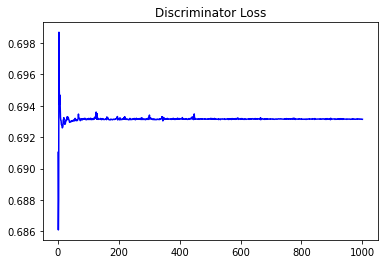

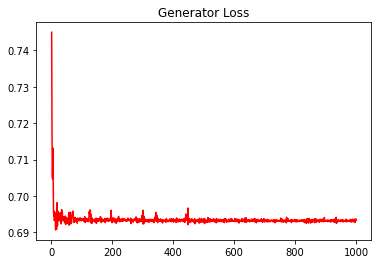

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21423146499792317


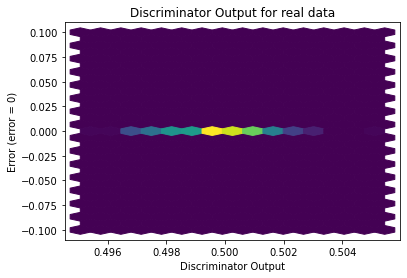

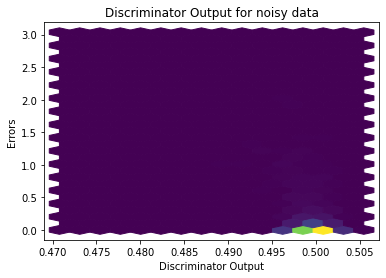

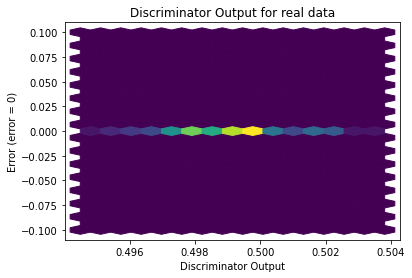

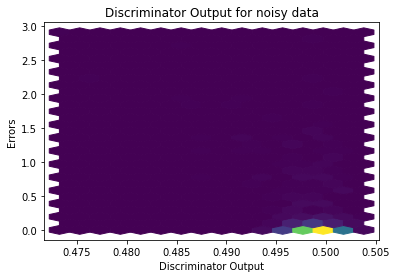

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


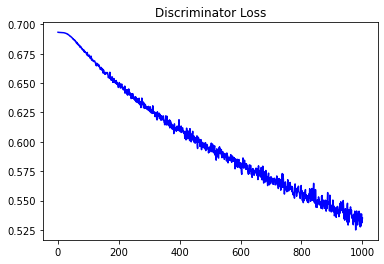

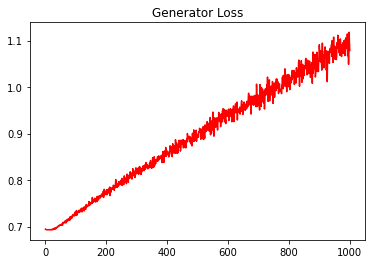

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21159832538050563


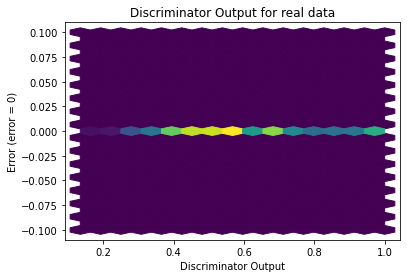

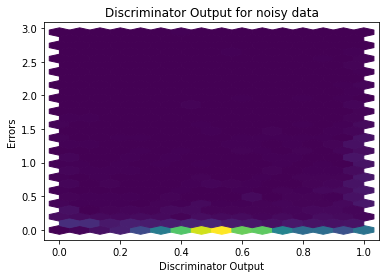

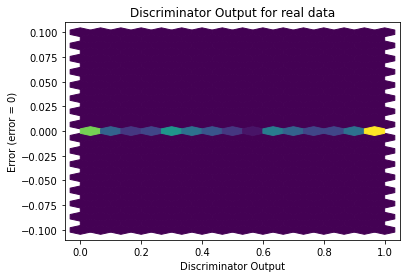

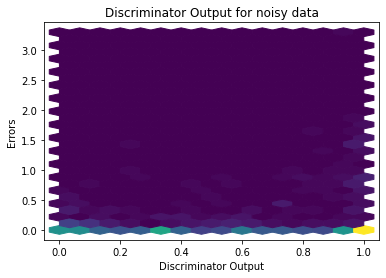

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
